#  Linear Regression
L'objectif de ce tp est de comprendre en profondeur l'algorithme de la descente du gradient, algorithme d'optimisation de fonction convexe. La première partie de ce tp est dédiée à la prise en main de python et à l'étude de cet algorithme dans le cas de fonctions simples. La deuxième partie est consacrée à l'application de cet algorithme au cas de la regression linéaire.

In [8]:
from tools import *
%matplotlib inline

## Gradient Descent

### Preamble
Télécharger le fichier [tools.py](http://). Un fichier python est comme un module : vous pouvez charger tout ce que contient un fichier en exécutant `from tools import *` . De manière générale, nous aurons besoin des modules `numpy` (pour les maths), `matplotlib.pyplot` (pour les courbes et graphiques) et `sklearn` (pour l'apprentissage). Vous pouvez donner un racourci à un module (exemple classique : `import numpy as np`, puis `np.fonction` pour appeller une fonction du module `numpy`).  

### Algorithm
L'algorithme de descente du gradient est un algorithme itératif très utilisé pour optimiser une fonction continue dérivable. Son principe est d'approché pas à pas une solution (localement) optimale, en "suivant" la direction du gradient. A partir d'un point tiré aléatoirement $x_0$, le point est mis à jour itérativement en se déplaçant en direction inverse du gradient de la fonction $f$ :

1. $x_0=random()$
2. $x_{i+1} \leftarrow x_i -\epsilon*\nabla f(x_i)$
3. boucler sur 2.

La classe `OptimFunc` permet d'enregistrer les renseignements nécessaires à l'optimisation d'une fonction $f$ : la fonction elle-même, son gradient, et la dimension de l'entrée. Un exemple est donné ci-dessous dans le cas de la fonction $f(x)$.

In [9]:
class OptimFunc:
    def __init__(self, f=None, grad_f=None, dim=2):
        self.f=f
        self.grad_f=grad_f
        self.dim=dim
    def init(self,low=-1,high=1):
        return random.random(self.dim)*(high-low)+low

def lin_f(x): return x
def lin_grad(x): return 1
lin_optim=OptimFunc(lin_f,lin_grad,1)
#Function
lin_optim.f(3)
#and gradient :
lin_optim.grad_f(1)

1

#### Coder les fonctions suivantes et les instances de `OptimFunc` `xcosx` et `rosen` qui y correspondent :

- $xcosx(x)=x cos(x)$ en dimension 1
- $rosen(x_1,x_2)=100*(x_2-x_1^2)^2+(1-x_1)^2$  en dimension 2
 
#### Utiliser le code suivant (en le comprenant) pour afficher les fonctions précédentes.

In [10]:
#Function definition
def xcos(x):
	return x*np.cos(x)
def rosen(x):
	return 100*(x[1]-x[0]**2)**2+(1-x[0]**2)
#definition des gradients
def grad_rosen(x):
	return np.array([-400*x[0]*(x[1]-x[0]**2)-2*x[0],200*(x[1]-x[0]**2)])
def grad_xcos(x):
	return np.cos(x)-x*np.sin(x)

#Optimised functions
rosen_optim=OptimFunc(rosen,grad_rosen,2)
xcos_optim=OptimFunc(xcos,grad_xcos,1)

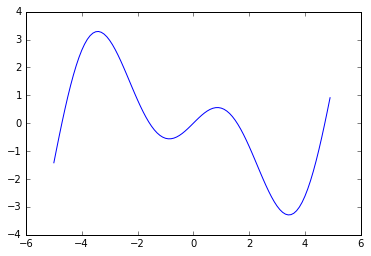

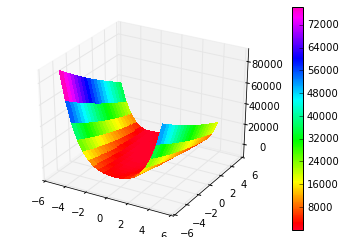

In [11]:
xrange=np.arange(-5,5,0.1)
plt.plot(xrange,xcos_optim.f(xrange))
plt.show()

### 3D display
grid,xvec,yvec=make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5)
#z=rosen_optim.f(grid).reshape(xvec.shape)
z=np.apply_along_axis(rosen_optim.f,1,grid).reshape(xvec.shape) #application a tous les axes un par un 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xvec, yvec, z, rstride=1, cstride=1, cmap=cm.gist_rainbow,linewidth=0, antialiased=False)
fig.colorbar(surf)
plt.show()

#### Utiliser la classe suivante pour optimiser les fonctions précédentes.
Cette classe implémente une descente de gradient. Quelle est le critère d'arrêt ? en voyez-vous d'autres ? A quoi correspond les variables `log_w`, `log_f`, `log_grad` ?


In [12]:
class GradientDescent:
    def __init__(self,optim_f,eps,max_iter=5000):
        self.optim_f=optim_f
        self.eps=eps
        self.max_iter=max_iter
    def reset(self):
        self.i=0
        self.w = self.optim_f.init()
        self.log_w=np.array(self.w)
        self.log_f=np.array(self.optim_f.f(self.w))
        self.log_grad=np.array(self.optim_f.grad_f(self.w))
    def optimize(self,reset=True):
        if reset:
            self.reset()
        while not self.stop():
            self.w = self.w - self.get_eps()*self.optim_f.grad_f(self.w)
            self.log_w=np.vstack((self.log_w,self.w))
            self.log_f=np.vstack((self.log_f,self.optim_f.f(self.w)))
            self.log_grad=np.vstack((self.log_grad,self.optim_f.grad_f(self.w)))
            if self.i%1000==0:
                print(self.i," iterations ",self.log_f[self.i])
            self.i+=1
    def stop(self):
        return (self.i>2) and (self.max_iter and (self.i>self.max_iter))
    def get_eps(self):
        return self.eps

0  iterations  [-0.50231248]
1000  iterations  [-0.55996004]
2000  iterations  [-0.56107813]
3000  iterations  [-0.56109605]
4000  iterations  [-0.56109633]
5000  iterations  [-0.56109634]


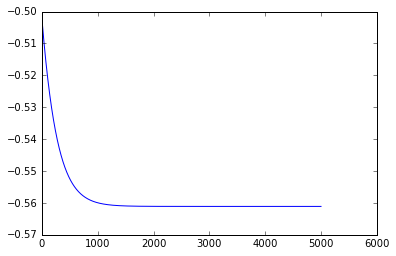

0  iterations  [ 0.19265048]
1000  iterations  [ 0.09934457]
2000  iterations  [ 0.00034426]
3000  iterations  [-0.09867777]
4000  iterations  [-0.19204395]
5000  iterations  [-0.27524396]


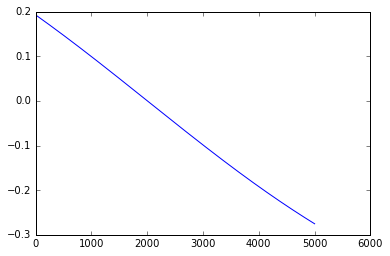

0  iterations  [ 0.13003456]
1000  iterations  [ 0.12050647]
2000  iterations  [ 0.11090901]
3000  iterations  [ 0.10124729]
4000  iterations  [ 0.09152658]
5000  iterations  [ 0.08175223]


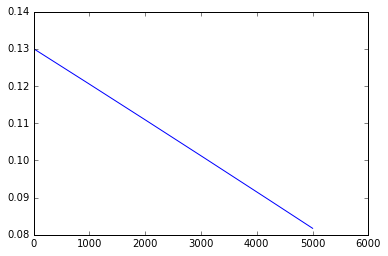

In [13]:
#xcosx
GD1 = GradientDescent(xcos_optim, 1e-3)
GD1.optimize()

xrange=np.arange(0,5002,1)
plt.plot(xrange,GD1.log_f)
plt.show()

GD2 = GradientDescent(xcos_optim, 1e-4)
GD2.optimize()

xrange=np.arange(0,5002,1)
plt.plot(xrange,GD2.log_f)
plt.show()

GD3 = GradientDescent(xcos_optim, 1e-5)
GD3.optimize()

xrange=np.arange(0,5002,1)
plt.plot(xrange,GD3.log_f)
plt.show()

0  iterations  [ 11.79569258]
1000  iterations  [ 0.70966181]
2000  iterations  [ 0.01460838]
3000  iterations  [-0.83071658]
4000  iterations  [ 3.70018069]
5000  iterations  [ 1.39741573]


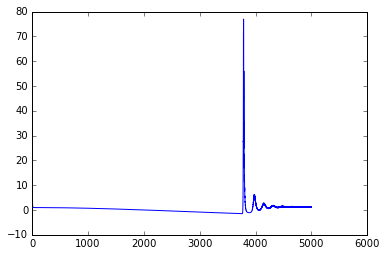

0  iterations  [ 7.05800906]
1000  iterations  [ 0.96228712]
2000  iterations  [ 0.94704502]
3000  iterations  [ 0.9270402]
4000  iterations  [ 0.90162471]
5000  iterations  [ 0.87039916]


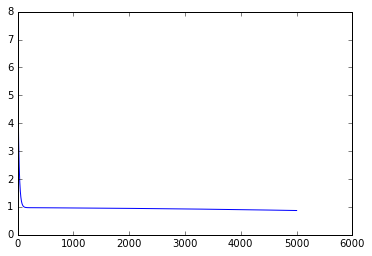

0  iterations  [ 7.87602257]
1000  iterations  [ 0.86206474]
2000  iterations  [ 0.85028133]
3000  iterations  [ 0.84648764]
4000  iterations  [ 0.84264844]
5000  iterations  [ 0.8387509]


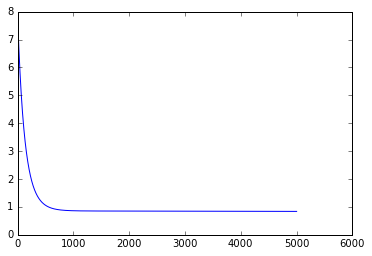

In [14]:
#rosen
GD1 = GradientDescent(rosen_optim, 1e-3)
GD1.optimize()

xrange=np.arange(0,5002,1)
plt.plot(xrange,GD1.log_f)
plt.show()

GD2 = GradientDescent(rosen_optim, 1e-4)
GD2.optimize()

xrange=np.arange(0,5002,1)
plt.plot(xrange,GD2.log_f)
plt.show()

GD3 = GradientDescent(rosen_optim, 1e-5)
GD3.optimize()

xrange=np.arange(0,5002,1)
plt.plot(xrange,GD3.log_f)
plt.show()

Tracez les courbes de la valeur de la fonction en fonction du nombre d'itérations en faisant varier la variable `epsilon`. Que remarquez-vous ? Tracer la trajectoire d'optimisation à l'aide des fonctions d'affichage précédentes.
Trouvez-vous toujours la même solution en fonction des exécutions ? Si non, de quoi dépend-elle ? Est-ce normal ?

## Linear Regression
Etant donné un ensemble de $n$ points en $d$ dimensions et leurs valeurs cibles  $\{(x^i,y^i)\}\in X\times Y \subset \mathbb{R}^d\times \mathbb{R}$, le problème de la régression linéaire est de trouver une fonction linéaire $f : X \to Y$ qui minimise l'erreur quadratique $\sum_i \frac{1}{2n}(f(x^i)-y^i)^2$. La fonction $f$ étant linéaire, on peut la paramétriser par $\mathbf{w} \in \mathbb{R}^{d+1}$ : $f_\mathbf{w}(x)=\sum_{i=1}^d w_i x_i+w_0$. L'objectif est alors de trouver $\mathbf{w}$ qui minimise l'erreur quadratique. En cours vous avez vu la résolution exacte. Dans ce qui suit, nous allons étudier la résolution de ce problème à l'aide de la descente du gradient.

- Faites une fonction `gen_1d(n,eps)` qui engendre $n$ données 1D selon la droite $f(x)=2*x+1$ que vous bruiterez avec un bruit gaussien de variance `eps` (avec un code de deux lignes, en utilisant les fonctions `np.random.random()` et `np.random.normal()`, étudier l'aide avec la fonction `help()`). Cette fonction doit vous rendre les coordonnées $x$ des points ainsi que leurs valeurs.
- Quel est le calcul matriciel permettant de calculer $f_\mathbf{w}$ ? Et son gradient ?
- Quelle est la fonction (et son gradient) à optimiser dans ce cas ? Comment adapter la descente de gradient à ce problème ?
- A quoi correspond $w_0$ ? Comment l'intégrer en pratique ?
- Utiliser une classe héritée (voir squelette ci-dessous) pour coder la régression linéaire.
- Tester votre fonction sur les données engendrées. Tracez la solution.

In [15]:
def gen_1d(n,eps):
    x=np.random.random(n)*10
    L=2*x+1+np.random.normal(0,eps,n)
    return np.transpose(np.vstack((x,L)))


data=gen_1d(10,0.1)
print(data)

[[  5.31358255  11.6446128 ]
 [  9.58450906  20.17052119]
 [  1.34229093   3.57381054]
 [  5.32876391  11.78540138]
 [  7.41194151  15.88577142]
 [  1.39951114   3.6908812 ]
 [  4.39766691   9.85718347]
 [  6.96082887  14.82411892]
 [  0.59667642   2.04467318]
 [  5.54668841  12.04361361]]


In [16]:
class Regression(Classifier,GradientDescent,OptimFunc):
    def __init__(self,eps=1e-2,max_iter=5000):
        GradientDescent.__init__(self,self,eps,max_iter)
        self.dim=self.data=self.y=self.n=self.w=None
    def fit(self,data,y, init=True):
        self.y=y
        self.n=y.shape[0]
        self.dim=data.size/self.n+1
        print("y", self.y.shape)
        print("n",self.n)
        self.data=data.reshape((self.n,self.dim-1))
        self.data=np.hstack((np.ones((self.n,1)),self.data))
        if init:
            self.w = self.init()
        self.optimize()
    def f(self,w):
        #temp = (1/2*(self.n))*(np.linalg.norm(self.y-self.data.dot(w.T)))**2
        return (1/2)*np.mean(np.square(np.dot(self.data,w.T)-self.y))
    
    def grad_f(self,w):
        tmp = np.mean(np.multiply(self.data,(np.dot(self.data, to_line(w).T) - self.y)),axis = 0)
        return tmp 
    def init(self):
        return to_line(np.random.random(self.dim)*(np.max(self.data)-np.min(self.data))+np.min(self.data))
    def predict(self,data):
        n=data.size/(self.dim-1)
        return np.hstack((np.ones((n,1)),data.reshape(n,self.dim-1))).dot(self.w)

    


In [17]:
r = Regression()
data = gen_1d(100,0.1)
a = data[:,0]
b = data[:,1]
r.fit(to_line(a), to_col(b))


y (100, 1)
n 100
0  iterations  [ 526.67938064]
1000  iterations  [ 0.00444598]
2000  iterations  [ 0.00363815]
3000  iterations  [ 0.00363202]
4000  iterations  [ 0.00363198]
5000  iterations  [ 0.00363198]


/Users/danconstantini/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/danconstantini/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


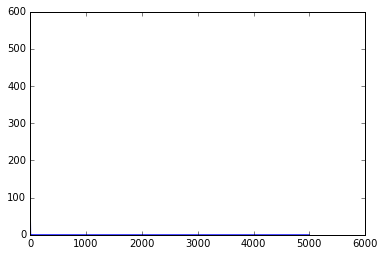

In [18]:
xrange1 = np.arange(0,5002,1)
plt.figure()
plt.plot(xrange1,r.log_f)
plt.show()

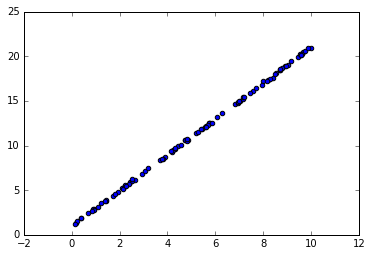

In [19]:
plt.scatter(a, b)
plt.show()


### Commentaires
Les coefficients de la droite sont données par $w$.